#Timless Album : A Twitter Sentiment and Engagement Analysis Project.

This project aims to uncover insights behind Davido's album - Timeless which was released on 30th of March. 

The data collection was from day of release to the 10th of April, using the hashtags 'timeless' and 'timelessalbum'. 

# Project Overview 
This project consists of three main parts;
- Data Collection/ Gathering: Libraries used are snscrape (for scraping tweets from Twitter) and pandas (to read-in the data).

- Data Cleaning and Preprocessing: Libraries used are nltk (Natural Processing Language Toolkit), textblob (for sentiment analysis), pandas (for data cleaning and analysis), emot (for emoji identification). 

- Data Analysis and Visualization: Libraries used are matplotlib and wordcloud (for data visualization). 


In [ ]:
pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
# import important libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import Counter

#import snscrape.modules.twitter as sntwitter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from emot.emo_unicode import UNICODE_EMOJI
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image

import textblob
from textblob import TextBlob

import random
import string
%matplotlib inline

# Data Collection 
In this section, I will be using snscrape to gather tweets containing 'timeless' and 'timelessalbum' independently and will merge them as a single data frame. 

*NOTE*❗ : I previously scraped the data in another notebook before I started having 'Error 404' in my snscrape code. Hence,to make things look nice, I decided to start in a new notebook from the merged 
dataset. 

Check out the notebook and how the data was scraped [here](https://github.com/Preshynodis/Davido-Timeless-Twitter-Sentiment-Analysis/blob/main/TwitterScraping.ipynb) .

*WHAT'S DIFFERENT*❓ : I performed natural language processing (data preprocessing) on the 'Tweet' column, which was stored in a new column 'cleaned_text'. This column was used for sentiment analysis and retriving polarity of tweets. Also, unsuccesfully didn't extract mentioned **Tracks** from tweet column which was already stored as 'Tracks' in a new column (hence empty). The merged dataset has these 4 extra columns, we can now continue the analysis here. 


In [ ]:
# reading in the merged dataset

df = pd.read_csv("Timelesstwitter.csv")

#### Dataset Exploration

In [ ]:
df.head(3)

,Unnamed: 0,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,Track,cleaned_text,Polarity,Sentiment
0,0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,NaN,en,"@Naija_PR True love should not be searched, ra...",7,0,0,2,NaN,pr true love searched rather ask “ true love s...,0.440000,Positive
1,1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,0,0,NaN,😍😌,0.000000,Neutral
2,2,2023-04-09 22:42:26+00:00,https://twitter.com/Gidiflyguys/status/1645195...,Gidiflyguys,False,Twitter for Android,Lekki Phase 1,en,Davido narrates how he got to collaborate with...,5,1,0,0,NaN,davido narrates got collaborate asake new album,0.136364,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90027 entries, 0 to 90026
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     90027 non-null  int64  
 1   Date           90027 non-null  object 
 2   TweetURL       90027 non-null  object 
 3   User           90027 non-null  object 
 4   Verified       90027 non-null  bool   
 5   Source         90027 non-null  object 
 6   Location       63864 non-null  object 
 7   Language       90027 non-null  object 
 8   Tweet          90027 non-null  object 
 9   Likes_Count    90027 non-null  int64  
 10  Retweet_Count  90027 non-null  int64  
 11  Quote_Count    90027 non-null  int64  
 12  Reply_Count    90027 non-null  int64  
 13  Track          0 non-null      float64
 14  cleaned_text   81250 non-null  object 
 15  Polarity       90027 non-null  float64
 16  Sentiment      90027 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(9)
memory

From the code above, we can have an overview of the datatypes of our different columns and also check for issues with the dataset to be addressed in data cleaning. 

In [ ]:
# To check the shape of our dataset
print('\n'f'The dataset comprises of: \n * {df.shape[0]} tweets and \n * {df.shape[1]} columns''\n')


The dataset comprises of: 
 * 90027 tweets and 
 * 17 columns



In [ ]:
# checking for popularity of the tweets
total_likes = df.Likes_Count.sum()
total_retweet = df.Retweet_Count.sum()

print("Total Number of Likes is ", total_likes)
print("Total Number of Retweets is", total_retweet)

Total Number of Likes is  2565687
Total Number of Retweets is 505570


In [ ]:
# checking for null values 
df.isna().sum()

Unnamed: 0           0
Date                 0
TweetURL             0
User                 0
Verified             0
Source               0
Location         26163
Language             0
Tweet                0
Likes_Count          0
Retweet_Count        0
Quote_Count          0
Reply_Count          0
Track            90027
cleaned_text      8777
Polarity             0
Sentiment            0
dtype: int64

In [ ]:
#summary statistics of the dataset
df.describe()

,Unnamed: 0,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,Track,Polarity
count,90027.000000,90027.000000,90027.000000,90027.000000,90027.000000,0.0,90027.000000
mean,46277.491119,28.499084,5.615760,0.446755,0.991125,NaN,0.109523
std,27585.052098,587.292423,154.547706,32.485689,23.535824,NaN,0.253558
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-1.000000
25%,22506.500000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,45013.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,70198.500000,3.000000,0.000000,0.000000,0.000000,NaN,0.200000
max,95588.000000,70236.000000,20334.000000,5395.000000,3918.000000,NaN,1.000000


#### Quality issues with the dataset 
- Track column contains 100% null values, while Location and cleaned_text columns contained but a lower percentage. 
- Unnamed column is unnecessary and should be deleted
- Loation and Cleaned_text columns have missing values
- Some columns (Date) have incorrect data types 

#### Data Cleaning 

In [ ]:
# Dropping the column with 100% null values and irrelevant column. 

df.drop(columns=["Track",'Unnamed: 0'], inplace= True)

In [ ]:
# changing the datatype of our date column
df['Date'] = df['Date'].apply(pd.to_datetime)

In [ ]:
# to check 

#to find the maximum date of the tweet
print(df["Date"].max())
#to find the minimum date of the tweet
print(df["Date"].min())

2023-04-09 23:13:53+00:00
2022-03-31 00:02:54+00:00


In [ ]:
# filling nulls in location column using fillna
df.Location.fillna('No Location', inplace=True)

In [ ]:
df["cleaned_text"]= df.cleaned_text.apply(str)

In [ ]:
# quick preview of dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90027 entries, 0 to 90026
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           90027 non-null  datetime64[ns, UTC]
 1   TweetURL       90027 non-null  object             
 2   User           90027 non-null  object             
 3   Verified       90027 non-null  bool               
 4   Source         90027 non-null  object             
 5   Location       90027 non-null  object             
 6   Language       90027 non-null  object             
 7   Tweet          90027 non-null  object             
 8   Likes_Count    90027 non-null  int64              
 9   Retweet_Count  90027 non-null  int64              
 10  Quote_Count    90027 non-null  int64              
 11  Reply_Count    90027 non-null  int64              
 12  cleaned_text   90027 non-null  object             
 13  Polarity       90027 non-null  float64        

#### Data Preprocessing

In [ ]:
#Creating a list of all Timeless album tracks 
'''Tracks =  ["over dem", "feel", "in the garden", "godfather", "unavailable", "bop", "e pain me", "away", "precision", "kante", "na money", "juju", 
           "no competition", "picasso", "for the road", "lcnd", "champion sound"]''' 

Tracks =  ["overdem", "feel", "inthegarden", "godfather", "unavailable", "bop", "epainme", "away", "precision", "kante", "namoney", "juju", 
           "nocompetition", "picasso", "forthe road", "lcnd", "championsound"]

In [ ]:
# Defining a function to replace track names as one word track name in a new column new_track

def trackNames(timeless):
    replacements =  [("overdem", "overdem"),("feel", "feel"), ("in the garden", "inthegarden"),("god father", "godfather"),
                     ("unavailable", "unavailable"), ("bop", "bop") , ("e pain me", "epainme"), ("away", "away"), ("precision", "precision"), 
                     ("kante", "kante"), ("na money", "namoney"), ("juju", "juju"), ("no competition","nocompetition"), ("picasso", "picasso"),
                     ("forthe road", "forthe road"), ("lcnd", "lcnd"), ("championsound", "championsound")]

    for pat, repl in replacements: 
        timeless = re.sub(pat, repl, timeless)
    return timeless

df["new_track"] = df['Tweet'].apply(trackNames)
df.head(2)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,cleaned_text,Polarity,Sentiment,Track,new_track
0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,No Location,en,"@Naija_PR True love should not be searched, ra...",7,0,0,2,pr true love searched rather ask “ true love s...,0.44,Positive,,"@Naija_PR True love should not be searched, ra..."
1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,0,0,😍😌,0.00,Neutral,,@davido #TIMELESS 😍😌


In [ ]:
# Define function to extract Timeless Track from each new_track column
def gettrackName(tweet_track):
    tweet_track = tweet_track.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(tweet_track) #splits each word in tweet_track for parsing
    track_name = [char for char in tweet_tokens if char in Tracks] 
    return " ".join(track_name)

In [ ]:
# Extract tracks to a new column 
df['ttrack'] = df['new_track'].apply(gettrackName)
df.head(2)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,cleaned_text,Polarity,Sentiment,Track,new_track,ttrack
0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,No Location,en,"@Naija_PR True love should not be searched, ra...",7,0,0,2,pr true love searched rather ask “ true love s...,0.44,Positive,,"@Naija_PR True love should not be searched, ra...",nocompetition
1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,0,0,😍😌,0.00,Neutral,,@davido #TIMELESS 😍😌,


In [ ]:
# Store track in a list
track_list = df['ttrack'].tolist()

# Iterating over all track names and split where there is more than one track instance
track = []
for item in track_list:
    item = item.split()
    for i in item:
        track.append(i)

In [ ]:
# Getting unique count of all tracks
counts = Counter(track)
track_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
track_df.columns = ['Track', 'Count']
track_df.sort_values(by='Count', ascending=False, inplace=True)
print("The Total Number of Unique Tracks is: ", track_df.shape[0])
track_df

The Total Number of Unique Tracks is:  16


,Track,Count
1,kante,2425
6,feel,1689
2,away,1458
3,unavailable,1448
8,godfather,937
5,picasso,686
7,lcnd,658
9,precision,483
10,bop,365
14,juju,344


In [ ]:
# Saving the Track dataframe to csv file
track_df.to_csv('Timeless_Track.csv')

In [ ]:
# Defining a function to extract hashtags with REGEX(Regular Expressions)

def getHashtags(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [ ]:
# Getting Hashtags and storing in column 'hashtags'
df['hashtags'] = df['Tweet'].apply(getHashtags)
df.head(2)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,cleaned_text,Polarity,Sentiment,Track,new_track,ttrack,hashtags
0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,No Location,en,"@Naija_PR True love should not be searched, ra...",7,0,0,2,pr true love searched rather ask “ true love s...,0.44,Positive,,"@Naija_PR True love should not be searched, ra...",nocompetition,#mannyandmaria #davido #timeless #dmw #obo #30...
1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,0,0,😍😌,0.00,Neutral,,@davido #TIMELESS 😍😌,,#timeless


In [ ]:
# Store hashtags in a list
hashtags_list = df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

In [ ]:
# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  29523


In [ ]:
# Checking the hashtag dataframe for the top 10 hashtags used
hashtags_df.head(10)

,hashtags,count
2,#timeless,53363
25,#timelessalbum,43837
1,#davido,6448
412,#savetimeless,2717
13984,#treeverse,1644
5,#30bg,1453
1966,#aprilfoolsday,1056
1925,#donaldtrump,1017
780,#classic,769
218,#davidoisback,729


In [ ]:
# Saving hashtags dataframe to a csv file
hashtags_df.to_csv('Timeless_Hashtags.csv')

In [ ]:
#Creating a list of all artists that were featured on Timeless album 
''' Feats =  ['morravey', 'musa keys', 'musa', 'dexta daps', 'dexta', 'fave','skepta', 'cavemen', 'angelique kidjo', 'kidjo',
              'asake', 'logos olori','logos']'''
            
Feats =  ['morravey', 'musakeys', 'dextadaps', 'fave','skepta', 'cavemen', 'angeliquekidjo', 'asake', 'logosolori']

In [ ]:
#Getting the most mentioned featured artist of Timeless album

def feats(timeless):
    replacements =  [('morravey', 'morravey'), ('musa keys', 'musakeys'), ('dexta daps', 'dextadaps'), ('fave', 'fave'), 
                    ('skepta', 'skepta'), ('cavemen', 'cavemen'), ('angelique kidjo', 'angeliquekidjo'), ('asake', 'asake'), 
                    ('logos olori', 'logosolori')]

    for pat, repl in replacements: 
        timeless = re.sub(pat, repl, timeless)
    return timeless

df["feat_tweets"] = df['Tweet'].apply(trackNames)
df.head(2)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,cleaned_text,Polarity,Sentiment,Track,new_track,ttrack,hashtags,feat_tweets
0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,No Location,en,"@Naija_PR True love should not be searched, ra...",7,0,0,2,pr true love searched rather ask “ true love s...,0.44,Positive,,"@Naija_PR True love should not be searched, ra...",nocompetition,#mannyandmaria #davido #timeless #dmw #obo #30...,"@Naija_PR True love should not be searched, ra..."
1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,0,0,😍😌,0.00,Neutral,,@davido #TIMELESS 😍😌,,#timeless,@davido #TIMELESS 😍😌


In [ ]:
# Define function to extract featured artists from each feat_tweets
def getfeats(feature):
    feature = feature.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(feature) #splits each word in tweet_track for parsing
    feat_name = [char for char in tweet_tokens if char in Feats] 
    return " ".join(feat_name)

In [ ]:
# Extract featured artists to a new column
df['Features'] = df['feat_tweets'].apply(getfeats)
df.head(2)

,Date,TweetURL,User,Verified,Source,Location,Language,Tweet,Likes_Count,Retweet_Count,...,Reply_Count,cleaned_text,Polarity,Sentiment,Track,new_track,ttrack,hashtags,feat_tweets,Features
0,2023-04-09 23:09:29+00:00,https://twitter.com/TheKingWisdom11/status/164...,TheKingWisdom11,False,Twitter for iPhone,No Location,en,"@Naija_PR True love should not be searched, ra...",7,0,...,2,pr true love searched rather ask “ true love s...,0.44,Positive,,"@Naija_PR True love should not be searched, ra...",nocompetition,#mannyandmaria #davido #timeless #dmw #obo #30...,"@Naija_PR True love should not be searched, ra...",asake
1,2023-04-09 22:47:58+00:00,https://twitter.com/B0LUWATIFE_DMW/status/1645...,B0LUWATIFE_DMW,False,Twitter for Android,DMW,qme,@davido #TIMELESS 😍😌,0,0,...,0,😍😌,0.00,Neutral,,@davido #TIMELESS 😍😌,,#timeless,@davido #TIMELESS 😍😌,


In [ ]:
# Store features in a list
feat_list = df['Features'].tolist()

# Iterate over all featured artist names and split where there is more than one instance
feats = []
for item in feat_list:
    item = item.split()
    for i in item:
        feats.append(i)

In [ ]:
# Determine unique count of all features
counts = Counter(feats)
features_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
features_df.columns = ['Artist', 'Count']
features_df.sort_values(by='Count', ascending=False, inplace=True)
print("The Total Number of Unique Features is: ", features_df.shape[0])
features_df

The Total Number of Unique Features is:  9


,Artist,Count
0,asake,1858
1,fave,1789
3,morravey,653
7,cavemen,545
4,skepta,501
5,angeliquekidjo,171
2,logosolori,155
6,musakeys,24
8,dextadaps,3


In [ ]:
# Saving features' dataframe to a csv file
features_df.to_csv('Timeless_Features.csv')

In [ ]:
# getting the most tagged accounts in the tweets
mentions = df['Tweet'].str.extractall(r'(\@\w*)')[0].str.lower().value_counts()

mentions = mentions[mentions.index != '@']
mentions = mentions[mentions.index != '@youtube'] # '@youtube' is removed because we need original twitter accounts
#to get the top 10 most mentioned accounts
mentions = mentions[:10].sort_values(ascending = True)
print(mentions)

@blaccmajek         401
@wizkidayo          404
@lotsofspots2       410
@dayoamusa          489
@davido_global      528
@kathyhake          609
@dhavidote          672
@lifeofolaa         696
@jjay00007          832
@davido           12319
Name: 0, dtype: int64


In [ ]:
# to save it to a dataframe
mentions.to_csv("top_mentions.csv", index_label="mentions")

##### Data Visualization and Exploratory Analysis

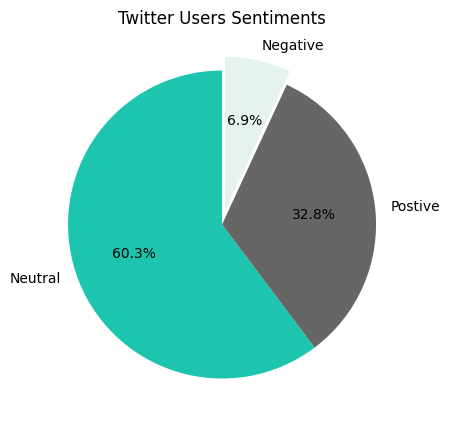

In [ ]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[7,5], facecolor='none')
plt.pie(df['Sentiment'].value_counts(), labels=['Neutral','Postive', "Negative"], colors=['#1dc5af', '#666666', '#E6f2ee'], startangle=90, explode= [0,0,0.09], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments');

In [ ]:
# Save to dataframe
plt.savefig("Sentiments.png", format="png")

<Figure size 640x480 with 0 Axes>

In [ ]:
sorted =track_df.sort_values('Count', ascending=True)

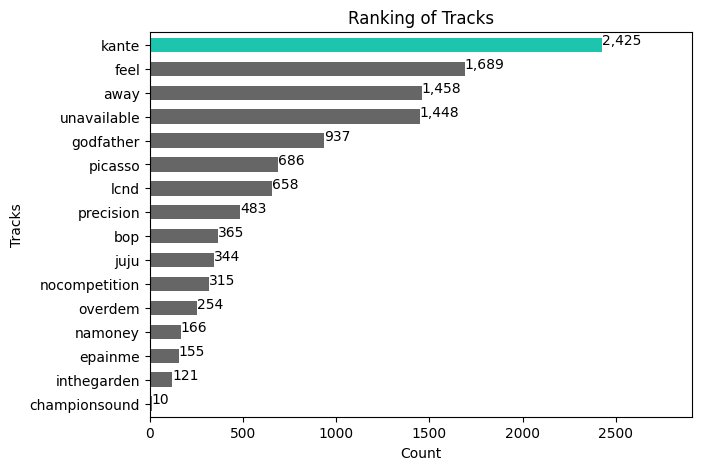

<Figure size 640x480 with 0 Axes>

In [ ]:
ax = sorted.plot.barh(x='Track', y='Count', figsize=(7,5), legend=None, width=0.6, color=['#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666', '#666666','#666666','#666666','#666666','#666666','#666666','#666666', '#1dc5af'])
plt.title('Ranking of Tracks');
plt.grid(False)
plt.ylabel('Tracks')
plt.xlabel('Count')
ax.set_facecolor('white')

plt.rcParams['axes.facecolor'] = 'white'


for y, x in enumerate(sorted.Count):
    ax.annotate("{:,}".format(x), xy=(x, y))
    ax.set_xlim(0, sorted.Count.max()*1.2)

plt.show()

# Save to dataframe
plt.savefig("Features.png", dpi= 200);

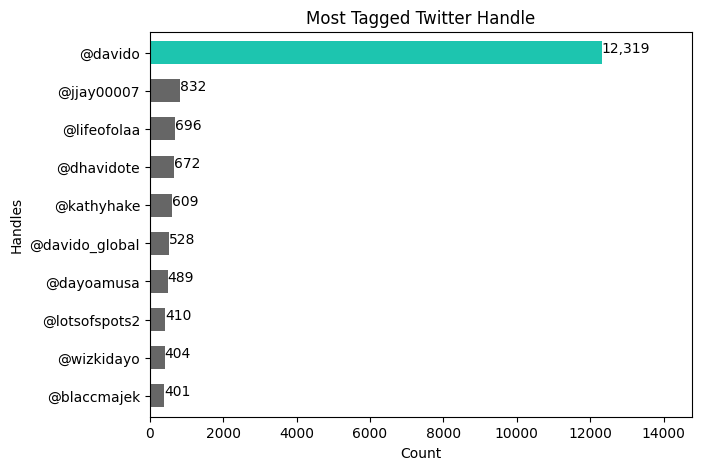

In [ ]:
#visual for most tagged account

ax = mentions.plot.barh(x=mentions.index, y='Count', figsize=(7,5), legend=None, width=0.6, color=['#666666', '#666666','#666666','#666666','#666666','#666666','#666666', '#666666','#666666', '#1dc5af'])
plt.title('Most Tagged Twitter Handle');
plt.grid(False)
plt.ylabel('Handles')
plt.xlabel('Count')
ax.set_facecolor('white')

plt.rcParams['axes.facecolor'] = 'white'


for y, x in enumerate(mentions):
    ax.annotate("{:,}".format(x), xy=(x, y))
    ax.set_xlim(0, mentions.max()*1.2)

plt.show()

#### Creating a Word-Cloud

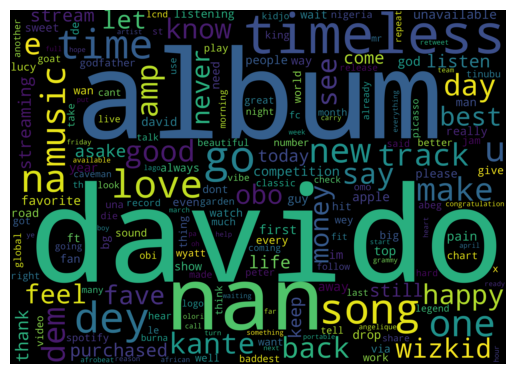

In [ ]:
tweets = df['cleaned_text'].tolist()
tweets = " ".join(tweets)


#w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'black', width = 7000, height = 5000).generate(tweets)


w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'black', width = 7000, height = 5000).generate(tweets)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
w_cloud.to_file("Wordcloud2.png")

In [ ]:
df.to_csv("Timeless_Final.csv", index=False)

In [ ]:
# Get the most-liked post 
df.groupby('TweetURL').sum()['Likes_Count'].sort_values(ascending = False).head(1)


TweetURL
https://twitter.com/davido/status/1642498413001416705    70236
Name: Likes_Count, dtype: int64

Text(0.5, 0, 'Count')

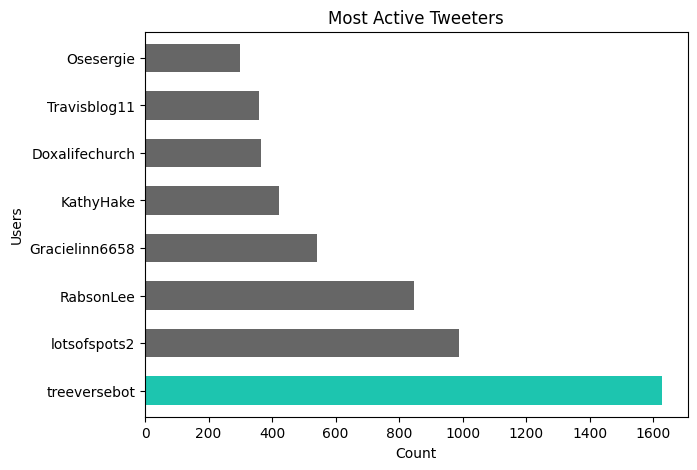

In [ ]:
# Get the most active tweeters
df.groupby('User').count()['Tweet'].sort_values(ascending = False).head(8).plot.barh(x=mentions.index, y='Count', figsize=(7,5), legend=None, width=0.6, color=['#1dc5af','#666666', '#666666','#666666','#666666','#666666','#666666','#666666', '#666666'])

plt.title('Most Active Tweeters');
plt.grid(False)
plt.ylabel('Users')
plt.xlabel('Count')

Get to know me better 

- [LinkedIn](https://linkedin.com.in/preciousnnodi)
- [Twitter](https://twitter.com/Presh_shee)